In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import matplotlib.colors as cl
from matplotlib.colorbar import Colorbar
import seaborn as sns
import pandas as pd
import numpy as np
import glob
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

In [2]:
tess_list = glob.glob('./targetdata/*_tess.csv')

tess_data = []

for filename in tess_list:
    df = pd.read_csv(filename, index_col=None, header=0)
    tess_data.append(df)
    
tess_data = pd.concat(tess_data, axis=0, ignore_index=True)

In [3]:
kic_t = tess_data['KIC']
p_r_t = tess_data['Santos Period (d)']

ls_tess_a = tess_data['LS Period 1st peak (d)']
ls_tess_b = tess_data['LS Period 2nd peak (d)']
ls_tess_c = tess_data['LS Period 3rd peak (d)']
ls_tess_amp_a = tess_data['LS Period 1st amplitude']
ls_tess_amp_b = tess_data['LS Period 2nd amplitude']
ls_tess_amp_c = tess_data['LS Period 3rd amplitude']
ls_tess_rms_a = tess_data['LS Period 1st RMS']
ls_tess_rms_b = tess_data['LS Period 2nd RMS']
ls_tess_rms_c = tess_data['LS Period 3rd RMS']
ls_tess_mad_a = tess_data['LS Period 1st MAD']
ls_tess_mad_b = tess_data['LS Period 2nd MAD']
ls_tess_mad_c = tess_data['LS Period 3rd MAD']
ls_tess2_a = tess_data['LS 2-term Period 1st peak (d)']
ls_tess2_b = tess_data['LS 2-term Period 2nd peak (d)']
ls_tess2_c = tess_data['LS 2-term Period 3rd peak (d)']
ls_tess2_amp_a = tess_data['LS 2-term Period 1st amplitude']
ls_tess2_amp_b = tess_data['LS 2-term Period 2nd amplitude']
ls_tess2_amp_c = tess_data['LS 2-term Period 3rd amplitude']
ls_tess2_rms_a = tess_data['LS 2-term Period 1st RMS']
ls_tess2_rms_b = tess_data['LS 2-term Period 2nd RMS']
ls_tess2_rms_c = tess_data['LS 2-term Period 3rd RMS']
ls_tess2_mad_a = tess_data['LS 2-term Period 1st MAD']
ls_tess2_mad_b = tess_data['LS 2-term Period 2nd MAD']
ls_tess2_mad_c = tess_data['LS 2-term Period 3rd MAD']
acf_tess_a = tess_data['ACF Period 1st peak (d)']
acf_tess_b = tess_data['ACF Period 2nd peak (d)']
acf_tess_c = tess_data['ACF Period 3rd peak (d)']
acf_tess_amp_a = tess_data['ACF Period 1st amplitude']
acf_tess_amp_b = tess_data['ACF Period 2nd amplitude']
acf_tess_amp_c = tess_data['ACF Period 3rd amplitude']
acf_tess_rms_a = tess_data['ACF Period 1st RMS']
acf_tess_rms_b = tess_data['ACF Period 2nd RMS']
acf_tess_rms_c = tess_data['ACF Period 3rd RMS']
acf_tess_mad_a = tess_data['ACF Period 1st MAD']
acf_tess_mad_b = tess_data['ACF Period 2nd MAD']
acf_tess_mad_c = tess_data['ACF Period 3rd MAD']
ls_med_tess = tess_data['LS median power']
ls2_med_tess = tess_data['LS 2-term median power']
rvar_tess = tess_data['Rvar']
cdpp_tess = tess_data['CDPP']

In [4]:
ts1 = pd.read_csv('S21r_train.csv')
ts2 = pd.read_csv('S21n_train.csv')
training_set = pd.concat([ts1, ts2])
kic_match = training_set['KIC']
kp_match = training_set['Kp']
teff_match = training_set['Teff']
binary_match = training_set['Flag_Binary']
koi_match = training_set['Flag_KOI']
# sph_match = training_set['Sph']

# kic_t_train = kic_match[:np.where(kic_match==max(kic_t))[0][0]+1].reindex(kic_t).index.values
# kp_t = [m for (k, m) in zip(kic_match, kp_match) if k in kic_t.values]
# teff_t = [t for (k, t) in zip(kic_match, teff_match) if k in kic_t.values]
# flag_binary_t = [f for (k, f) in zip(kic_match, binary_match) if k in kic_t.values]
# flag_koi_t = [f for (k, f) in zip(kic_match, koi_match) if k in kic_t.values]
# sph_t = [s for (k, s) in zip(kic_match, sph_match) if k in kic_t.values]

In [5]:
period_state = [1 if p > 0 else 0 for p in p_r_t]

In [6]:
# %matplotlib notebook

# fig, ax = plt.subplots(1)
# ax.scatter(p_r_t, ls_tess_a, c=period_state, s=10)
# ax.plot(range(-10,150),range(-10,150),'k-', lw=1)
# ax.set(xlim=(-1, 60), ylim=(-1,30),
#        xlabel='Santos 21 period (d)', ylabel='LS period (d)')

In [7]:
features = np.array([ls_tess_a, ls_tess_b, ls_tess_c,
                    ls_tess_amp_a, ls_tess_amp_b, ls_tess_amp_c,
                    ls_tess_rms_a, ls_tess_rms_b, ls_tess_rms_c,
                    ls_tess_mad_a, ls_tess_mad_b, ls_tess_mad_c,
                    ls_tess2_a, ls_tess2_b, ls_tess2_c,
                    ls_tess2_amp_a, ls_tess2_amp_b, ls_tess2_amp_c,
                    ls_tess2_rms_a, ls_tess2_rms_b, ls_tess2_rms_c,
                    ls_tess2_mad_a, ls_tess2_mad_b, ls_tess2_mad_c,
                    acf_tess_a, acf_tess_b, acf_tess_c,
                    acf_tess_amp_a, acf_tess_amp_b, acf_tess_amp_c,
                    acf_tess_rms_a, acf_tess_rms_b, acf_tess_rms_c,
                    acf_tess_mad_a, acf_tess_mad_b, acf_tess_mad_c,
#                     ls_med_tess, rvar_tess, cdpp_tess])#,
                    ls_med_tess, ls2_med_tess, rvar_tess, cdpp_tess])#,
                    #kp_t, teff_t])#, flag_binary_t, flag_koi_t])
feature_names = ['LS Period 1st peak (d)', 'LS Period 2nd peak (d)', 'LS Period 3rd peak (d)',
                 'LS Period 1st amplitude', 'LS Period 2nd amplitude', 'LS Period 3rd amplitude',
                 'LS Period 1st RMS', 'LS Period 2nd RMS', 'LS Period 3rd RMS',
                 'LS Period 1st MAD', 'LS Period 2nd MAD', 'LS Period 3rd MAD',
                 'LS 2-term Period 1st peak (d)', 'LS 2-term Period 2nd peak (d)', 'LS 2-term Period 3rd peak (d)',
                 'LS 2-term Period 1st amplitude', 'LS 2-term Period 2nd amplitude', 'LS 2-term Period 3rd amplitude',
                 'LS 2-term Period 1st RMS', 'LS 2-term Period 2nd RMS', 'LS 2-term Period 3rd RMS',
                 'LS 2-term Period 1st MAD', 'LS 2-term Period 2nd MAD', 'LS 2-term Period 3rd MAD',
                 'ACF Period 1st peak (d)', 'ACF Period 2nd peak (d)', 'ACF Period 3rd peak (d)',
                 'ACF Period 1st amplitude', 'ACF Period 2nd amplitude', 'ACF Period 3rd amplitude',
                 'ACF Period 1st RMS', 'ACF Period 2nd RMS', 'ACF Period 3rd RMS',
                 'ACF Period 1st MAD', 'ACF Period 2nd MAD', 'ACF Period 3rd MAD',
#                  'LS median power', 'Rvar', 'CDPP']#,
                 'LS median power', 'LS 2-term median power', 'Rvar', 'CDPP']#,
#                  'Kp', 'Teff']#, 'Binary flag', 'KOI flag']

In [8]:
features[np.isnan(features)] = 0

In [9]:
forest = RandomForestClassifier(random_state=0)
forest.fit(features.T, period_state)

# classifier = svm.LinearSVC()
# classifier.fit(features.T, period_state)

RandomForestClassifier(random_state=0)

In [10]:
# classifier.get_params()

In [11]:
importances = forest.feature_importances_
# importances = np.abs(classifier.coef_[0])

In [12]:
for i, val in enumerate(importances):
    print(f'{feature_names[i]}: {val:.5f}')

LS Period 1st peak (d): 0.01746
LS Period 2nd peak (d): 0.01827
LS Period 3rd peak (d): 0.02760
LS Period 1st amplitude: 0.06895
LS Period 2nd amplitude: 0.03857
LS Period 3rd amplitude: 0.02895
LS Period 1st RMS: 0.01333
LS Period 2nd RMS: 0.01626
LS Period 3rd RMS: 0.00898
LS Period 1st MAD: 0.01606
LS Period 2nd MAD: 0.00932
LS Period 3rd MAD: 0.00894
LS 2-term Period 1st peak (d): 0.01565
LS 2-term Period 2nd peak (d): 0.02050
LS 2-term Period 3rd peak (d): 0.02351
LS 2-term Period 1st amplitude: 0.06947
LS 2-term Period 2nd amplitude: 0.06275
LS 2-term Period 3rd amplitude: 0.02249
LS 2-term Period 1st RMS: 0.01973
LS 2-term Period 2nd RMS: 0.01217
LS 2-term Period 3rd RMS: 0.00914
LS 2-term Period 1st MAD: 0.01560
LS 2-term Period 2nd MAD: 0.00978
LS 2-term Period 3rd MAD: 0.00903
ACF Period 1st peak (d): 0.01299
ACF Period 2nd peak (d): 0.00789
ACF Period 3rd peak (d): 0.00285
ACF Period 1st amplitude: 0.06377
ACF Period 2nd amplitude: 0.00986
ACF Period 3rd amplitude: 0.00352
A

## Testing

In [13]:
test_list = glob.glob('./testsetdata/*_tess.csv')

test_data = []

for filename in test_list:
    df = pd.read_csv(filename, index_col=None, header=0)
    test_data.append(df)
    
test_data = pd.concat(test_data, axis=0, ignore_index=True)

In [14]:
kic_t_test = test_data['KIC']
p_r_t_test = test_data['Santos Period (d)']

ls_tess_a_test = test_data['LS Period 1st peak (d)']
ls_tess_b_test = test_data['LS Period 2nd peak (d)']
ls_tess_c_test = test_data['LS Period 3rd peak (d)']
ls_tess_amp_a_test = test_data['LS Period 1st amplitude']
ls_tess_amp_b_test = test_data['LS Period 2nd amplitude']
ls_tess_amp_c_test = test_data['LS Period 3rd amplitude']
ls_tess_rms_a_test = test_data['LS Period 1st RMS']
ls_tess_rms_b_test = test_data['LS Period 2nd RMS']
ls_tess_rms_c_test = test_data['LS Period 3rd RMS']
ls_tess_mad_a_test = test_data['LS Period 1st MAD']
ls_tess_mad_b_test = test_data['LS Period 2nd MAD']
ls_tess_mad_c_test = test_data['LS Period 3rd MAD']
ls_tess2_a_test = test_data['LS 2-term Period 1st peak (d)']
ls_tess2_b_test = test_data['LS 2-term Period 2nd peak (d)']
ls_tess2_c_test = test_data['LS 2-term Period 3rd peak (d)']
ls_tess2_amp_a_test = test_data['LS 2-term Period 1st amplitude']
ls_tess2_amp_b_test = test_data['LS 2-term Period 2nd amplitude']
ls_tess2_amp_c_test = test_data['LS 2-term Period 3rd amplitude']
ls_tess2_rms_a_test = test_data['LS 2-term Period 1st RMS']
ls_tess2_rms_b_test = test_data['LS 2-term Period 2nd RMS']
ls_tess2_rms_c_test = test_data['LS 2-term Period 3rd RMS']
ls_tess2_mad_a_test = test_data['LS 2-term Period 1st MAD']
ls_tess2_mad_b_test = test_data['LS 2-term Period 2nd MAD']
ls_tess2_mad_c_test = test_data['LS 2-term Period 3rd MAD']
acf_tess_a_test = test_data['ACF Period 1st peak (d)']
acf_tess_b_test = test_data['ACF Period 2nd peak (d)']
acf_tess_c_test = test_data['ACF Period 3rd peak (d)']
acf_tess_amp_a_test = test_data['ACF Period 1st amplitude']
acf_tess_amp_b_test = test_data['ACF Period 2nd amplitude']
acf_tess_amp_c_test = test_data['ACF Period 3rd amplitude']
acf_tess_rms_a_test = test_data['ACF Period 1st RMS']
acf_tess_rms_b_test = test_data['ACF Period 2nd RMS']
acf_tess_rms_c_test = test_data['ACF Period 3rd RMS']
acf_tess_mad_a_test = test_data['ACF Period 1st MAD']
acf_tess_mad_b_test = test_data['ACF Period 2nd MAD']
acf_tess_mad_c_test = test_data['ACF Period 3rd MAD']
ls_med_tess_test = test_data['LS median power']
ls2_med_tess_test = test_data['LS 2-term median power']
rvar_tess_test = test_data['Rvar']
cdpp_tess_test = test_data['CDPP']

In [15]:
tst1 = pd.read_csv('S21r_test.csv')
tst2 = pd.read_csv('S21n_test.csv')
testing_set2 = pd.concat([tst1, tst2])
testing_set2 = testing_set2[~testing_set2.index.duplicated()]
kic_match2 = testing_set2['KIC']
kp_match2 = testing_set2['Kp']
teff_match2 = testing_set2['Teff']
binary_match2 = testing_set2['Flag_Binary']
koi_match2 = testing_set2['Flag_KOI']
# sph_match = training_set['Sph']

In [16]:
# kic_t_temp = kic_match2[:np.where(kic_match2==max(kic_t_test))[0][0]+1].reindex(kic_t_test).index.values
# kp_t_test = [m for (k, m) in zip(kic_match, kp_match) if k in kic_t_test.values]
# teff_t_test = [t for (k, t) in zip(kic_match, teff_match) if k in kic_t_test.values]
# flag_binary_t_test = [f for (k, f) in zip(kic_match, binary_match) if k in kic_t_test.values]
# flag_koi_t_test = [f for (k, f) in zip(kic_match, koi_match) if k in kic_t_test.values]
# sph_t = [s for (k, s) in zip(kic_match, sph_match) if k in kic_t.values]

In [17]:
test_features = np.array([ls_tess_a_test, ls_tess_b_test, ls_tess_c_test,
                    ls_tess_amp_a_test, ls_tess_amp_b_test, ls_tess_amp_c_test,
                    ls_tess_rms_a_test, ls_tess_rms_b_test, ls_tess_rms_c_test,
                    ls_tess_mad_a_test, ls_tess_mad_b_test, ls_tess_mad_c_test,
                    ls_tess2_a_test, ls_tess2_b_test, ls_tess2_c_test,
                    ls_tess2_amp_a_test, ls_tess2_amp_b_test, ls_tess2_amp_c_test,
                    ls_tess2_rms_a_test, ls_tess2_rms_b_test, ls_tess2_rms_c_test,
                    ls_tess2_mad_a_test, ls_tess2_mad_b_test, ls_tess2_mad_c_test,
                    acf_tess_a_test, acf_tess_b_test, acf_tess_c_test,
                    acf_tess_amp_a_test, acf_tess_amp_b_test, acf_tess_amp_c_test,
                    acf_tess_rms_a_test, acf_tess_rms_b_test, acf_tess_rms_c_test,
                    acf_tess_mad_a_test, acf_tess_mad_b_test, acf_tess_mad_c_test,
#                     ls_med_tess_test, rvar_tess_test, cdpp_tess_test])#,
                    ls_med_tess_test, ls2_med_tess_test, rvar_tess_test, cdpp_tess_test])#,
#                     kp_t_test, teff_t_test])#, flag_binary_t_test, flag_koi_t_test])
test_feature_names = ['LS Period 1st peak (d)', 'LS Period 2nd peak (d)', 'LS Period 3rd peak (d)',
                     'LS Period 1st amplitude', 'LS Period 2nd amplitude', 'LS Period 3rd amplitude',
                     'LS Period 1st RMS', 'LS Period 2nd RMS', 'LS Period 3rd RMS',
                     'LS Period 1st MAD', 'LS Period 2nd MAD', 'LS Period 3rd MAD',
                     'LS 2-term Period 1st peak (d)', 'LS 2-term Period 2nd peak (d)', 'LS 2-term Period 3rd peak (d)',
                     'LS 2-term Period 1st amplitude', 'LS 2-term Period 2nd amplitude', 'LS 2-term Period 3rd amplitude',
                     'LS 2-term Period 1st RMS', 'LS 2-term Period 2nd RMS', 'LS 2-term Period 3rd RMS',
                     'LS 2-term Period 1st MAD', 'LS 2-term Period 2nd MAD', 'LS 2-term Period 3rd MAD',
                     'ACF Period 1st peak (d)', 'ACF Period 2nd peak (d)', 'ACF Period 3rd peak (d)',
                     'ACF Period 1st amplitude', 'ACF Period 2nd amplitude', 'ACF Period 3rd amplitude',
                     'ACF Period 1st RMS', 'ACF Period 2nd RMS', 'ACF Period 3rd RMS',
                     'ACF Period 1st MAD', 'ACF Period 2nd MAD', 'ACF Period 3rd MAD',
#                      'LS median power', 'Rvar', 'CDPP']#,
                     'LS median power', 'LS 2-term median power', 'Rvar', 'CDPP']#,
#                  'Kp', 'Teff']#, 'Binary flag', 'KOI flag']

In [18]:
test_features[np.isnan(test_features)] = 0

In [19]:
predictions = forest.predict(test_features.T)
# predictions = classifier.predict(test_features.T)

In [20]:
period_state_test = [1 if p > 0 else 0 for p in p_r_t_test]

In [21]:
yy = 0
yn = 0
ny = 0
nn = 0
for p, g in zip(period_state_test, predictions):
    if p == 1 and g == 1:
        yy += 1
    elif p == 1 and g == 0:
        yn += 1
    elif p == 0 and g == 1:
        ny += 1
    elif p == 0 and g == 0:
        nn += 1

In [22]:
print('*** TESSIFY ***')
print('in the testing set:')
print(f'- {(yy+yn)/len(predictions)*100:.2f}% are rotators')
print(f'- {(nn+ny)/len(predictions)*100:.2f}% are non-rotators')
print('RF predicts that:')
print(f'- {(yy+ny)/len(predictions)*100:.2f}% are rotators')
print(f'- {(nn+yn)/len(predictions)*100:.2f}% are non-rotators')
print('for rotators in test set, RF predicts:')
print(f'- {yy/(yy+yn)*100:.2f}% are rotators')
print(f'- {yn/(yy+yn)*100:.2f}% are non-rotators')
print('for non-rotators in test set, RF predicts:')
print(f'- {ny/(ny+nn)*100:.2f}% are rotators')
print(f'- {nn/(ny+nn)*100:.2f}% are non-rotators')

*** TESSIFY ***
in the testing set:
- 34.15% are rotators
- 65.85% are non-rotators
RF predicts that:
- 34.09% are rotators
- 65.91% are non-rotators
for rotators in test set, RF predicts:
- 81.14% are rotators
- 18.86% are non-rotators
for non-rotators in test set, RF predicts:
- 9.69% are rotators
- 90.31% are non-rotators


In [23]:
yyc = 0
ync = 0
for p, g, gtp in zip(period_state_test, predictions, p_r_t_test):
    if gtp < 27:
        if p == 1 and g == 1:
            yyc += 1
        elif p == 1 and g == 0:
            ync += 1

In [24]:
print('for periods less than a sector in test set, RF predicts:')
print(f'- {yyc/(yyc+ync)*100:.2f}% are rotators')
print(f'- {ync/(yyc+ync)*100:.2f}% are non-rotators')

for periods less than a sector in test set, RF predicts:
- 83.08% are rotators
- 16.92% are non-rotators


In [25]:
testbins = np.arange(5,145,5)
percentage_correct = np.zeros(len(testbins))

for i, b in enumerate(testbins):
    
    b1 = b-5
    b2 = b
    count = 0
    count_yes = 0
    
    for p, g, gtp in zip(period_state_test, predictions, p_r_t_test):
        if gtp > b1 and gtp <= b2:
            count += 1
            if g == 1:
                count_yes += 1
    
    if count > 0:
        percentage_correct[i] = count_yes/count

In [26]:
percentage_correct

array([0.84030418, 0.85970149, 0.88118812, 0.84642857, 0.76878613,
       0.73538961, 0.75      , 0.70588235, 0.74390244, 0.76086957,
       0.66666667, 0.71428571, 0.8       , 1.        , 1.        ,
       0.75      , 0.        , 1.        , 1.        , 0.        ,
       0.        , 0.5       , 0.        , 0.5       , 0.        ,
       0.        , 0.        , 1.        ])

<IPython.core.display.Javascript object>


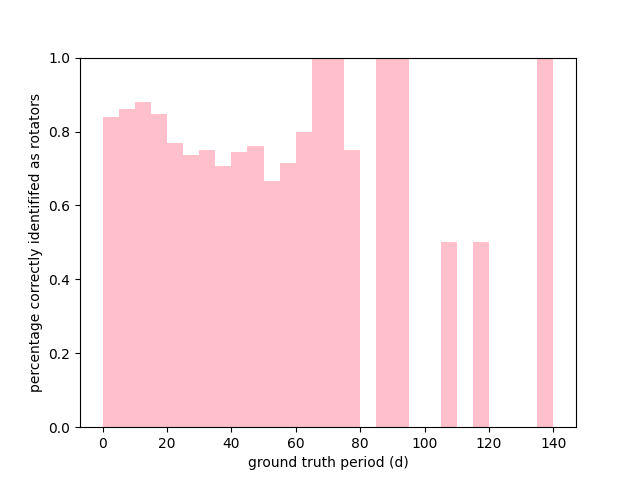

[(0.0, 1.0),
 Text(0.5, 0, 'ground truth period (d)'),
 Text(0, 0.5, 'percentage correctly identififed as rotators')]

In [89]:
%matplotlib notebook
fig, ax = plt.subplots(1)
ax.bar(testbins-2.5, percentage_correct, width=5, color='pink')
ax.set(ylim=(0,1), xlabel='ground truth period (d)', 
       ylabel='percentage correctly identififed as rotators')

<IPython.core.display.Javascript object>


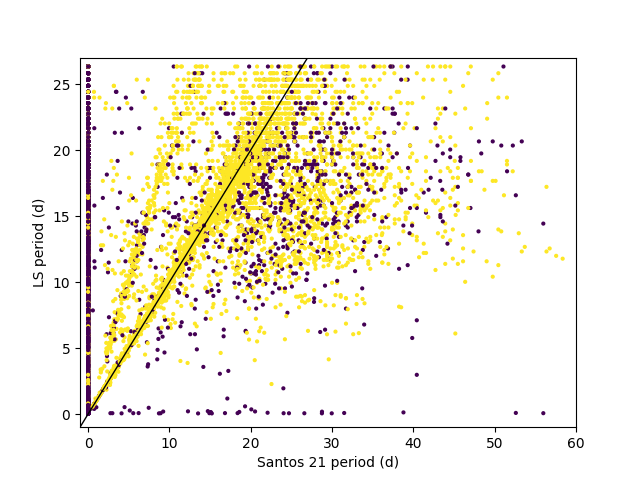

[(-1.0, 60.0),
 (-1.0, 27.0),
 Text(0.5, 0, 'Santos 21 period (d)'),
 Text(0, 0.5, 'LS period (d)')]

In [96]:
%matplotlib notebook

fig, ax = plt.subplots(1)
ax.scatter(p_r_t_test, ls_tess2_a_test, c=predictions, s=4)
ax.plot(range(-10,150),range(-10,150),'k-', lw=1)
ax.set(xlim=(-1, 60), ylim=(-1,27),
       xlabel='Santos 21 period (d)', ylabel='LS period (d)')

In [29]:
peri_pred = [p for (p, k) in zip(predictions, testing_set2['KIC'].values) if k in tst1['KIC'].values]
null_pred = [p for (p, k) in zip(predictions, testing_set2['KIC'].values) if k in tst2['KIC'].values]

In [30]:
peri_pred.count(1)/len(peri_pred)

0.3376787977548434

In [31]:
null_pred.count(1)/len(null_pred)

0.3434166812379787

In [32]:
residuals = ls_tess_a_test[p_r_t_test>0] / p_r_t_test[p_r_t_test>0]
residuals_yeah = ls_tess_a_test[(p_r_t_test>0)&(predictions==1)] / p_r_t_test[(p_r_t_test>0)&(predictions==1)]
residuals_nope = ls_tess_a_test[(p_r_t_test>0)&(predictions==0)] / p_r_t_test[(p_r_t_test>0)&(predictions==0)]

<IPython.core.display.Javascript object>


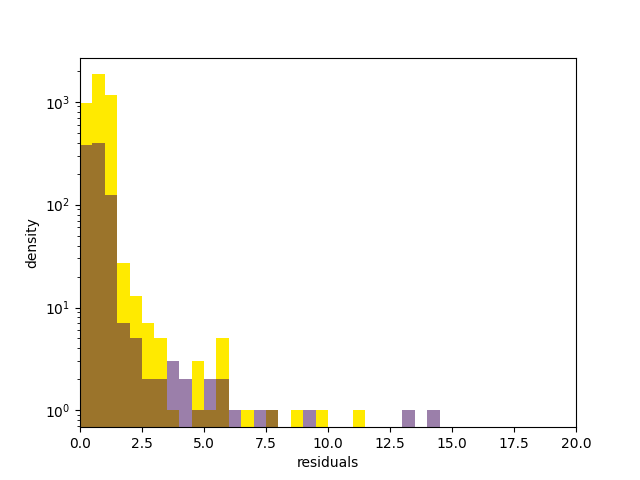

[(0.0, 20.0), Text(0.5, 0, 'residuals'), Text(0, 0.5, 'density')]

In [88]:
%matplotlib notebook

fig, ax = plt.subplots(1)
ax.hist(residuals_yeah, bins=np.arange(0,int(np.ceil(max(residuals_yeah))),0.5), log=True, density=False, color='#ffea00')
ax.hist(residuals_nope, bins=np.arange(0,int(np.ceil(max(residuals_nope))),0.5), log=True, density=False, color='#380057', alpha=0.5)
ax.set(xlim=(0,20), #ylim=(-5,60),
       xlabel='residuals', ylabel='density')

In [34]:
pred_yeah = ls_tess_a_test[(p_r_t_test>0)&(predictions==1)]
pred_nope = ls_tess_a_test[(p_r_t_test>0)&(predictions==0)]

<IPython.core.display.Javascript object>


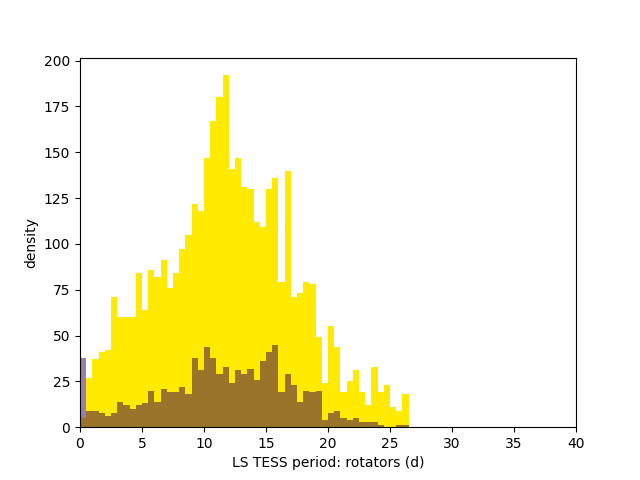

[(0.0, 40.0),
 Text(0.5, 0, 'LS TESS period: rotators (d)'),
 Text(0, 0.5, 'density')]

In [87]:
%matplotlib notebook

fig, ax = plt.subplots(1)
ax.hist(pred_yeah, bins=np.arange(0,int(np.ceil(max(pred_yeah))),0.5), log=False, 
        density=False, color='#ffea00')
ax.hist(pred_nope, bins=np.arange(0,int(np.ceil(max(pred_nope))),0.5), log=False, 
        density=False, color='#380057', alpha=0.5)
ax.set(xlim=(0,40), #ylim=(-5,60),
       xlabel='LS TESS period: rotators (d)', ylabel='density')

In [36]:
null_yeah = ls_tess_a_test[(p_r_t_test==0)&(predictions==1)]
null_nope = ls_tess_a_test[(p_r_t_test==0)&(predictions==0)]

<IPython.core.display.Javascript object>


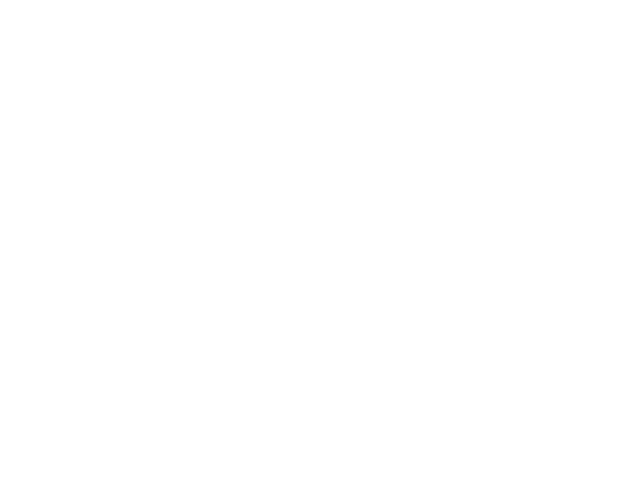

[(0.0, 25.0),
 Text(0.5, 0, 'LS TESS period: non-rotators (d)'),
 Text(0, 0.5, 'density')]

In [37]:
%matplotlib notebook

fig, ax = plt.subplots(1)
ax.hist(null_yeah, bins=np.arange(0,int(np.ceil(max(null_yeah))),0.5), log=False, 
        density=False, color='#ffea00')
ax.hist(null_nope, bins=np.arange(0,int(np.ceil(max(null_nope))),0.5), log=False, 
        density=False, color='#380057', alpha=0.5)
ax.set(xlim=(0,25), #ylim=(-5,60),
       xlabel='LS TESS period: non-rotators (d)', ylabel='density')

In [38]:
# top_ten = [(f, n) for _, f, n in sorted(zip(importances, test_features, test_feature_names), reverse=True)][-10:]
corner_features = [f for _, f in sorted(zip(importances, test_features), reverse=True)][:10]
corner_feature_names = [n for _, n in sorted(zip(importances, test_feature_names), reverse=True)][:10]

In [39]:
min(corner_features[9]), max(corner_features[9])

(9.457758560290632e-05, 1.2633733745944964)

In [40]:
# %matplotlib notebook

# fig = plt.figure(figsize=(15,15), constrained_layout=True)
# grid = gs.GridSpec(10,10, figure=fig)

# for i in range(10):
#     for j in range(10):
#         if i > j:
#             ax = fig.add_subplot(grid[i,j])
#             ax.scatter(corner_features[j], corner_features[i], c=predictions, s=2)
#             ax.set_xscale('log')
#             ax.set_yscale('log')
#             ax.tick_params(direction='in')
#             if i == 9:
#                 ax.set_xlabel(corner_feature_names[j], rotation=10)
#             if j == 0:
#                 ax.set_ylabel(corner_feature_names[i], rotation=80)

# fig.suptitle('all', x=0.09, y=0.95)

In [41]:
# %matplotlib notebook

# fig = plt.figure(figsize=(15,15), constrained_layout=True)
# grid = gs.GridSpec(10,10, figure=fig)

# for i in range(10):
#     for j in range(10):
#         if i > j:
#             ax = fig.add_subplot(grid[i,j])
#             ax.scatter(corner_features[j][p_r_t_test>0], corner_features[i][p_r_t_test>0], 
#                        c=predictions[p_r_t_test>0], s=2)
#             ax.set_xscale('log')
#             ax.set_yscale('log')
#             ax.tick_params(direction='in')
#             if i == 9:
#                 ax.set_xlabel(corner_feature_names[j], rotation=10)
#             if j == 0:
#                 ax.set_ylabel(corner_feature_names[i], rotation=80)

# fig.suptitle('S21 rotators', x=0.09, y=0.95)

In [42]:
# %matplotlib notebook

# fig = plt.figure(figsize=(15,15), constrained_layout=True)
# grid = gs.GridSpec(10,10, figure=fig)

# for i in range(10):
#     for j in range(10):
#         if i > j:
#             ax = fig.add_subplot(grid[i,j])
#             ax.scatter(corner_features[j][p_r_t_test==0], corner_features[i][p_r_t_test==0],
#                        c=predictions[p_r_t_test==0], s=2)
#             ax.set_xscale('log')
#             ax.set_yscale('log')
#             ax.tick_params(direction='in')
#             if i == 9:
#                 ax.set_xlabel(corner_feature_names[j], rotation=10)
#             if j == 0:
#                 ax.set_ylabel(corner_feature_names[i], rotation=80)

# fig.suptitle('S21 nonrotators', x=0.09, y=0.95)

<IPython.core.display.Javascript object>


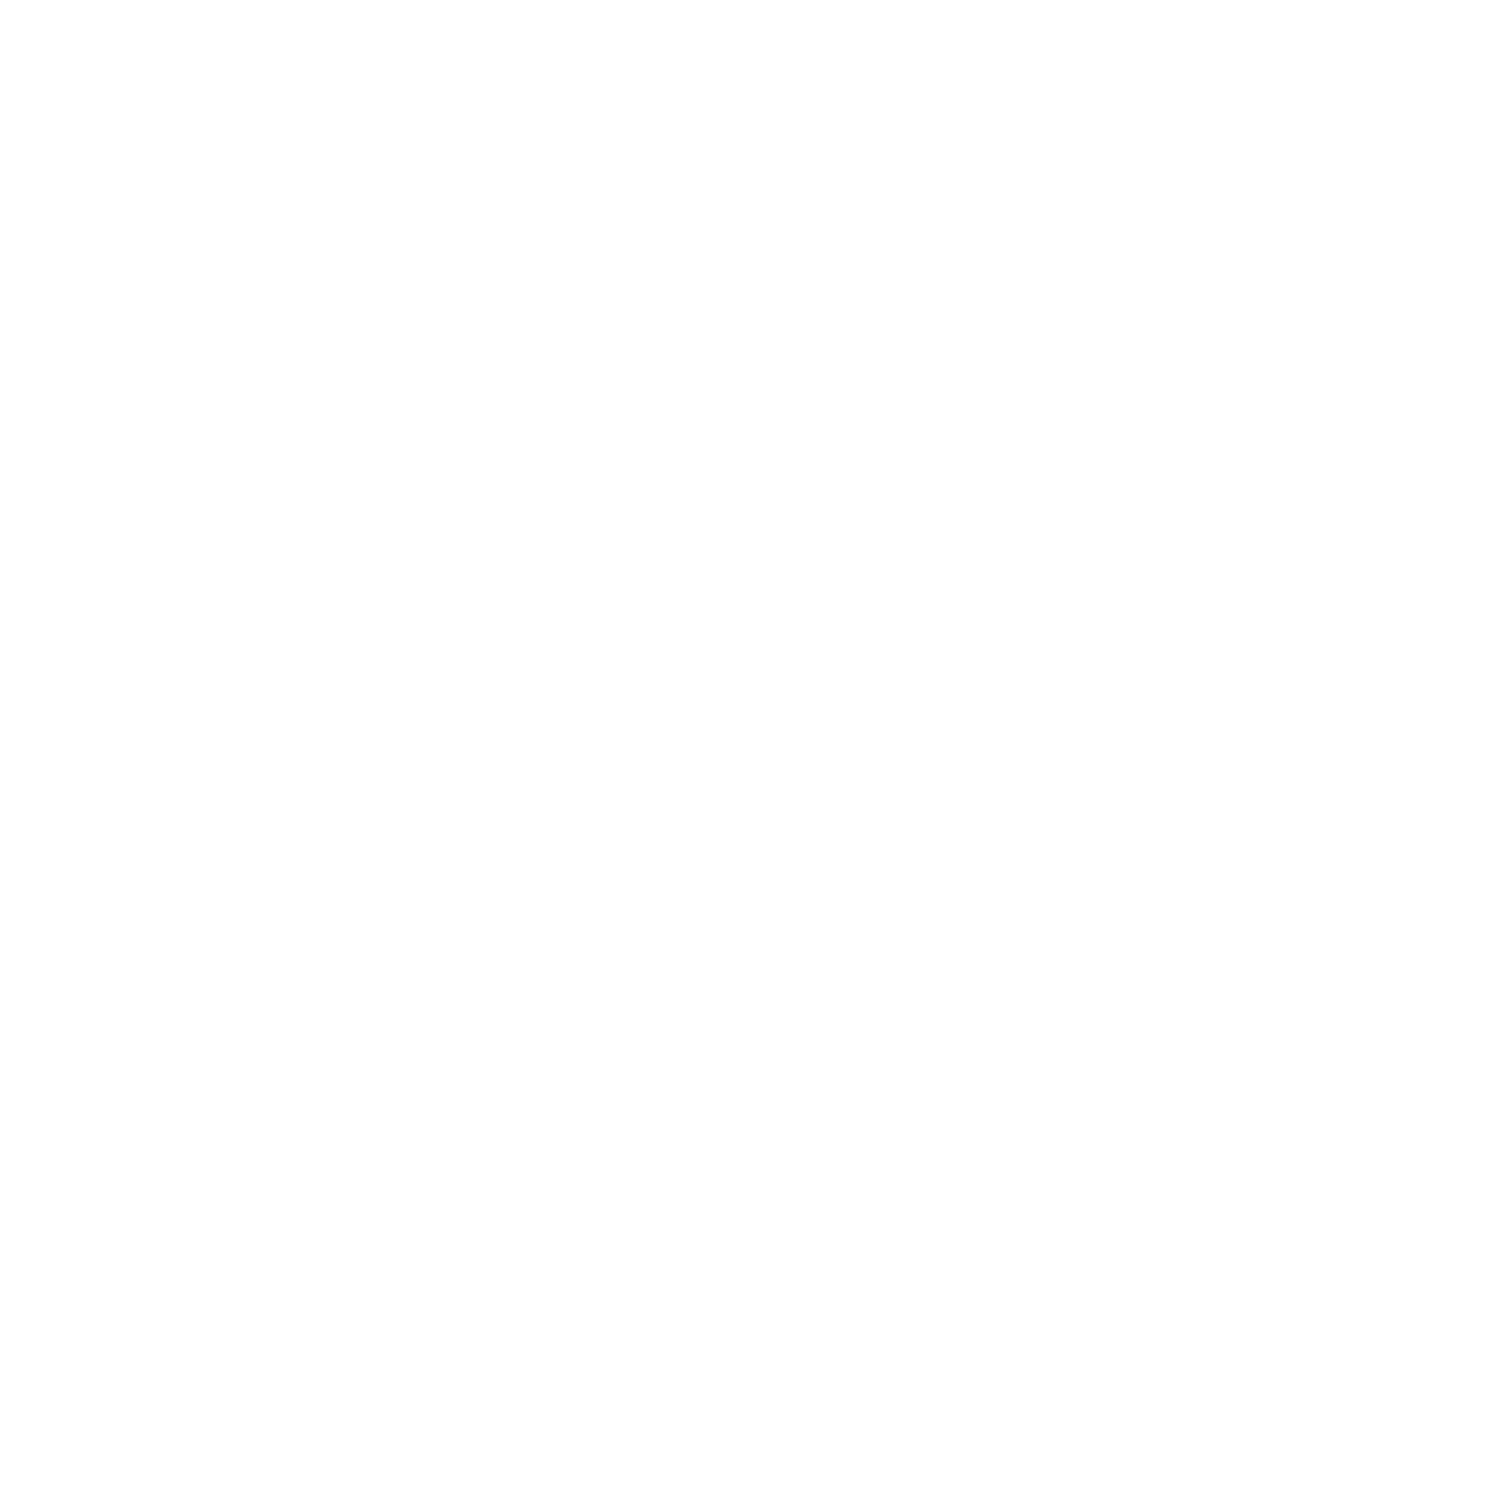

In [43]:
%matplotlib notebook

fig = plt.figure(figsize=(15,15), constrained_layout=True)
grid = gs.GridSpec(10,10, figure=fig)

corner_features[5] = corner_features[5] * 10

for i in range(10):
    for j in range(10):
        if i > j:
            ax = fig.add_subplot(grid[i,j])
            try:
                sns.kdeplot(ax=ax, x=corner_features[j][(p_r_t_test>0) & (predictions==0)],
                            y=corner_features[i][(p_r_t_test>0) & (predictions==0)],
#                                 fill=True, alpha=0.9,
                            color='#203a8a', log_scale=False)
                sns.kdeplot(ax=ax, x=corner_features[j][(p_r_t_test>0) & (predictions==1)],
                            y=corner_features[i][(p_r_t_test>0) & (predictions==1)],
#                                 fill=True, alpha=0.7, 
                            color='#379fdb', log_scale=False, alpha=0.5)
            except:
                ax.scatter(corner_features[j][(p_r_t_test>0) & (predictions==0)],
                            corner_features[i][(p_r_t_test>0) & (predictions==0)],
                            s=2, color='#203a8a', alpha=0.9)
                ax.scatter(corner_features[j][(p_r_t_test>0) & (predictions==1)],
                            corner_features[i][(p_r_t_test>0) & (predictions==1)],
                            s=2, color='#379fdb', alpha=0.7)
#                 ax.set_xscale('log')
#                 ax.set_yscale('log')
            ax.tick_params(direction='in')
            if i == 9:
                ax.set_xlabel(corner_feature_names[j], rotation=10)
            if j == 0:
                ax.set_ylabel(corner_feature_names[i], rotation=80)   
            if i == 7:
                ax.set_ylim(ymax=0.03)
            if j == 7:
                ax.set_xlim(xmax=0.03) 
            if i == 6:
                ax.set_ylim(ymax=40)
            if j == 6:
                ax.set_xlim(xmax=40)
            if i == 8:
                ax.set_ylim(ymax=125)
            if j == 8:
                ax.set_xlim(xmax=125)
            if i == 9:
                ax.set_ylim(ymax=60)
            if j == 9:
                ax.set_xlim(xmax=60)
        elif i == j:
            ax = fig.add_subplot(grid[i,j])
            ax.hist(corner_features[j][(p_r_t_test>0) & (predictions==0)], log=True, density=False, color='#203a8a')#, bins=bins
            ax.hist(corner_features[j][(p_r_t_test>0) & (predictions==1)], log=True, density=False, color='#379fdb', alpha=0.5)
#             fig[f'{shorthand[j]}'].set_xscale('log')
            if i == 9:
                ax.set_xlabel(corner_feature_names[i], rotation=10)
            if i == 0:
                ax.set_ylabel(corner_feature_names[i], rotation=80)


# fig.suptitle('S21 rotators', x=0.09, y=0.95)

<IPython.core.display.Javascript object>


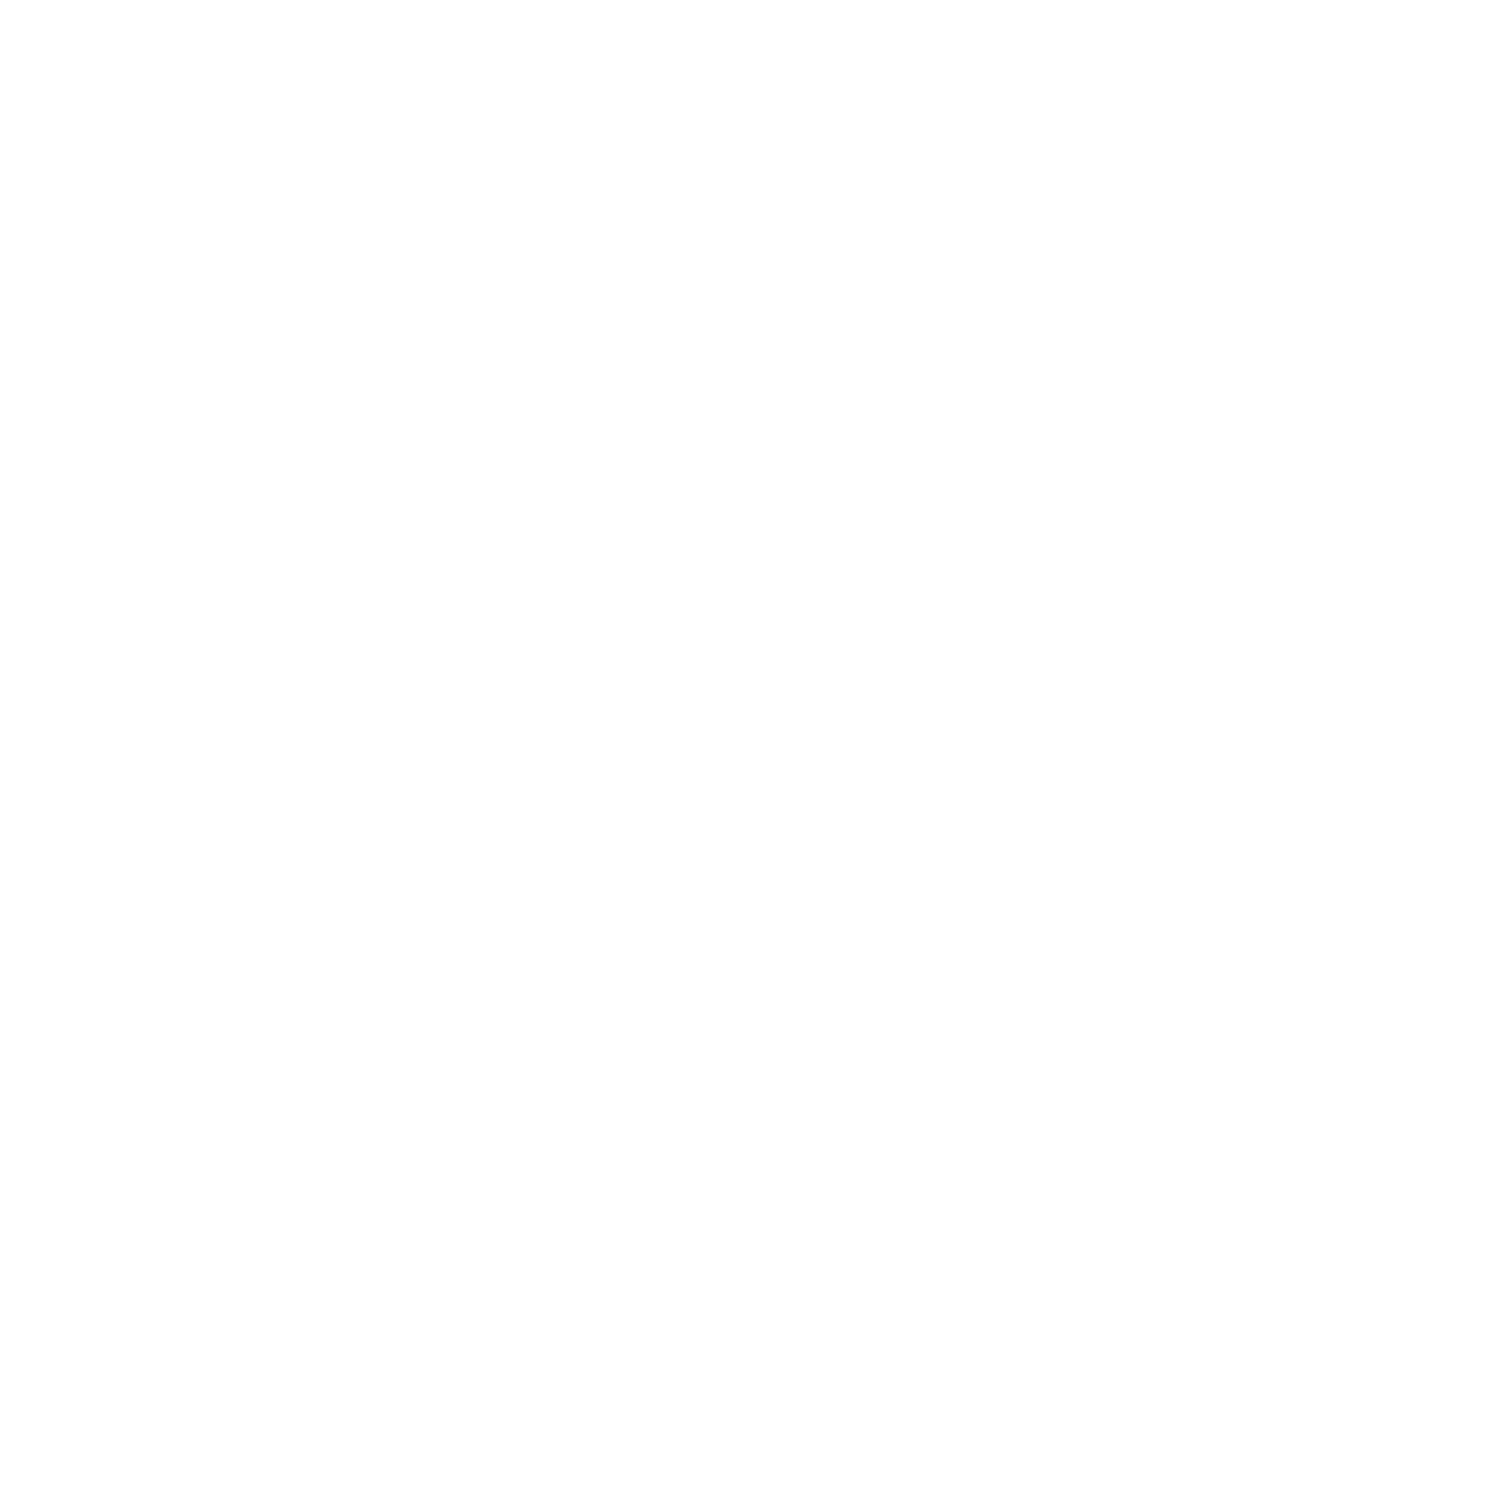

In [44]:
%matplotlib notebook

fig = plt.figure(figsize=(15,15), constrained_layout=True)
grid = gs.GridSpec(10,10, figure=fig)

for i in range(10):
    for j in range(10):
        if i > j:
            ax = fig.add_subplot(grid[i,j])
            if corner_feature_names[i] == 'ACF Period 1st amplitude':
                sns.kdeplot(ax=ax, x=corner_features[j][(p_r_t_test==0) & (predictions==0) & (corner_features[i]>0)],
                            y=corner_features[i][(p_r_t_test==0) & (predictions==0) & (corner_features[i]>0)],
#                             fill=True, alpha=0.9, 
                            color='#ba0f3f', log_scale=True)
                sns.kdeplot(ax=ax, x=corner_features[j][(p_r_t_test==0) & (predictions==1) & (corner_features[i]>0)],
                            y=corner_features[i][(p_r_t_test==0) & (predictions==1) & (corner_features[i]>0)],
#                             fill=True, alpha=0.7, 
                            color='#f72587', log_scale=True, alpha=0.5)
            elif corner_feature_names[j] == 'ACF Period 1st amplitude':
                sns.kdeplot(ax=ax, x=corner_features[j][(p_r_t_test==0) & (predictions==0) & (corner_features[j]>0)],
                            y=corner_features[i][(p_r_t_test==0) & (predictions==0) & (corner_features[j]>0)],
#                             fill=True, alpha=0.9, 
                            color='#ba0f3f', log_scale=True)
                sns.kdeplot(ax=ax, x=corner_features[j][(p_r_t_test==0) & (predictions==1) & (corner_features[j]>0)],
                            y=corner_features[i][(p_r_t_test==0) & (predictions==1) & (corner_features[j]>0)],
#                             fill=True, alpha=0.7,
                            color='#f72587', log_scale=True, alpha=0.5)
            else:
                try:
                    sns.kdeplot(ax=ax, x=corner_features[j][(p_r_t_test==0) & (predictions==0)],
                                y=corner_features[i][(p_r_t_test==0) & (predictions==0)],
    #                             fill=True, alpha=0.9,
                                color='#ba0f3f', log_scale=True)
                    sns.kdeplot(ax=ax, x=corner_features[j][(p_r_t_test==0) & (predictions==1)],
                                y=corner_features[i][(p_r_t_test==0) & (predictions==1)],
    #                             fill=True, alpha=0.7, 
                                color='#f72587', log_scale=True, alpha=0.5)
                except:
                    ax.scatter(corner_features[j][(p_r_t_test==0) & (predictions==0)],
                                corner_features[i][(p_r_t_test==0) & (predictions==0)],
                                s=2, color='#ba0f3f', alpha=0.9)
                    ax.scatter(corner_features[j][(p_r_t_test==0) & (predictions==1)],
                                corner_features[i][(p_r_t_test==0) & (predictions==1)],
                                s=2, color='#f72587', alpha=0.7)
                    ax.set_xscale('log')
                    ax.set_yscale('log')
            ax.tick_params(direction='in')
            if i == 9:
                ax.set_xlabel(corner_feature_names[j], rotation=10)
            if j == 0:
                ax.set_ylabel(corner_feature_names[i], rotation=80)
            if i == 7:
                ax.set_ylim(ymax=0.03)
            if j == 7:
                ax.set_xlim(xmax=0.03) 
            if i == 6:
                ax.set_ylim(ymax=40)
            if j == 6:
                ax.set_xlim(xmax=40)
            if i == 8:
                ax.set_ylim(ymax=125)
            if j == 8:
                ax.set_xlim(xmax=125)
            if i == 9:
                ax.set_ylim(ymax=60)
            if j == 9:
                ax.set_xlim(xmax=60)
        elif i == j:
            ax = fig.add_subplot(grid[i,j])
            ax.hist(corner_features[j][(p_r_t_test>0) & (predictions==0)], log=True, density=False, color='#ba0f3f')#, bins=bins
            ax.hist(corner_features[j][(p_r_t_test>0) & (predictions==1)], log=True, density=False, color='#f72587', alpha=0.5)
#             fig[f'{shorthand[j]}'].set_xscale('log')
            if i == 9:
                ax.set_xlabel(corner_feature_names[i], rotation=10)
            if i == 0:
                ax.set_ylabel(corner_feature_names[i], rotation=80)

# fig.suptitle('S21 nonrotators', x=0.09, y=0.95)

In [45]:
non_pred_yes = corner_features[(list(p_r_t_test.values)==0) & (list(predictions)==1)]
non_pred_no = corner_features[(list(p_r_t_test.values)==0) & (list(predictions)==0)]

# corner(non_pred_yes, non_pred_no)

# fig.suptitle('S21 nonrotators', x=0.09, y=0.95)

In [46]:
def corner(rotators, nonrotators, features=10, title=''):

    %matplotlib notebook
    
    shorthand = [f'f{i}' for i in range(features)]
    mosaic = np.zeros((features,features), dtype='U12')
    for i in range(features):
        for j in range(features):
            if i > j:
                mosaic[i,j] = f'{shorthand[j]}x{shorthand[i]}y'
            elif i == j:
                mosaic[i,j] = shorthand[i]
            else:
                mosaic[i,j] = '.'

    fig = plt.figure(figsize=(15,15), constrained_layout=True).subplot_mosaic(mosaic)

    for i in range(features):
        for j in range(features):
            if i > j:
                try:
                    sns.kdeplot(ax=fig[f'{shorthand[j]}x{shorthand[i]}y'], x=nonrotators[:,j],
                                y=nonrotators[:,i],
    #                             fill=True, alpha=0.9,
                                color='#380057', log_scale=False)
                    sns.kdeplot(ax=fig[f'{shorthand[j]}x{shorthand[i]}y'], x=rotators[:,j],
                                y=rotators[:,i],
    #                             fill=True, alpha=0.7, 
                                color='#ff8400', log_scale=False, alpha=0.5)
                except:
                    fig[f'{shorthand[j]}x{shorthand[i]}y'].scatter(nonrotators[:,j],
                                nonrotators[:,i],
                                s=2, color='#380057', alpha=0.9)
                    fig[f'{shorthand[j]}x{shorthand[i]}y'].scatter(rotators[:,j],
                                rotators[:,i],
                                s=2, color='#ff8400', alpha=0.7)
    #                 fig[f'{shorthand[j]}x{shorthand[i]}y'].set_xscale('log')
    #                 fig[f'{shorthand[j]}x{shorthand[i]}y'].set_yscale('log')
                if i == 9:
                    fig[f'{shorthand[j]}x{shorthand[i]}y'].set_xlabel(corner_feature_names[j], rotation=10)
                else:
                    fig[f'{shorthand[j]}x{shorthand[i]}y'].set_xlabel(None)
                if j == 0:
                    fig[f'{shorthand[j]}x{shorthand[i]}y'].set_ylabel(corner_feature_names[i], rotation=80)
                else:
                    fig[f'{shorthand[j]}x{shorthand[i]}y'].set_ylabel(None)
                if i == 9:
                    fig[f'{shorthand[j]}x{shorthand[i]}y'].set_ylim(ymax=0.03)
#                 if j == 7:
#                     fig[f'{shorthand[j]}x{shorthand[i]}y'].set_xlim(xmax=0.03)
                    
            elif i == j:
                fig[f'{shorthand[j]}'].hist(nonrotators[:,j], log=True, density=False, color='#380057')#, bins=bins
                fig[f'{shorthand[j]}'].hist(rotators[:,j], log=True, density=False, color='#ff8400', alpha=0.5)
    #             fig[f'{shorthand[j]}'].set_xscale('log')
                if i == 9:
                    fig[f'{shorthand[i]}'].set_xlabel(corner_feature_names[i], rotation=10)
                if i == 0:
                    fig[f'{shorthand[i]}'].set_ylabel(corner_feature_names[i], rotation=80)
#                 if j == 7:
#                     fig[f'{shorthand[i]}'].set_xlim(xmax=0.03)

    # ax.hist(residuals_yeah, bins=np.arange(0,int(np.ceil(max(residuals_yeah))),0.5), log=True, density=True, color='#ffea00')
    # ax.hist(residuals_nope, bins=np.arange(0,int(np.ceil(max(residuals_nope))),0.5), log=True, density=True, color='#380057', alpha=0.5)

    # fig.suptitle('S21 training set', x=0.09, y=0.95)

<IPython.core.display.Javascript object>


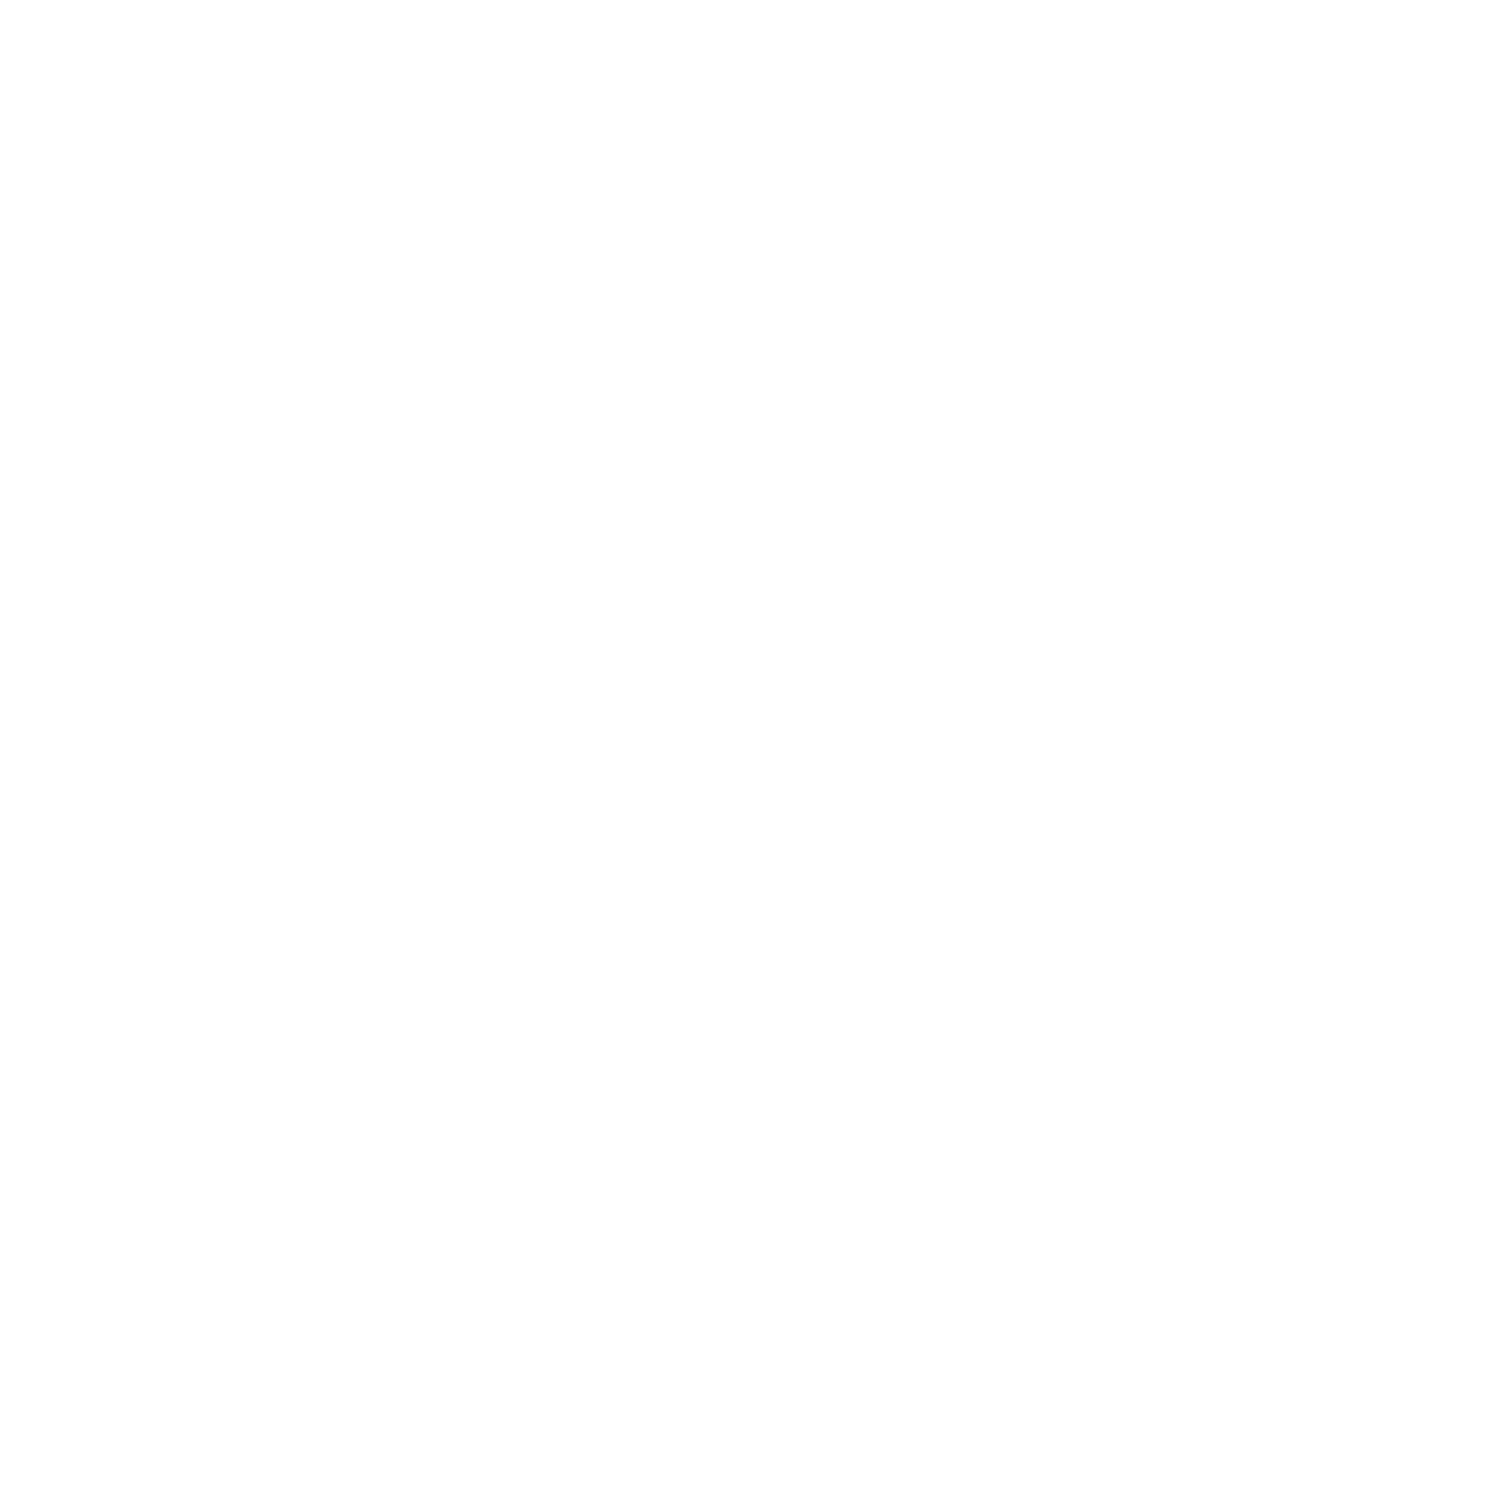

In [47]:
train_rot = tess_data[corner_feature_names][(p_r_t>0)][::100].values
train_nonrot = tess_data[corner_feature_names][(p_r_t==0)][::100].values

corner(train_rot, train_nonrot)

<IPython.core.display.Javascript object>


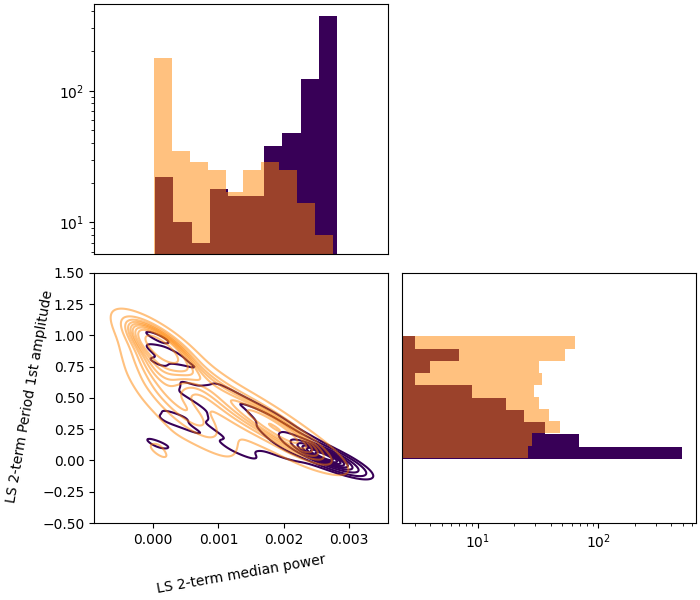

[]

In [84]:
%matplotlib notebook
features = 2
rotators = tess_data[corner_feature_names][(p_r_t>0)][::100].values
nonrotators = tess_data[corner_feature_names][(p_r_t==0)][::100].values

shorthand = [f'f{i}' for i in range(features)]
mosaic = """
        A.
        BC"""

fig = plt.figure(figsize=(7,6), constrained_layout=True).subplot_mosaic(mosaic)

# for the two medians
xlmin = -0.0009
xlmax = 0.0036
ylmin = -0.5#-0.0004
ylmax = 1.5#0.001505

sns.kdeplot(ax=fig['B'], x=nonrotators[:,0],
            y=nonrotators[:,2],
#                             fill=True, alpha=0.9,
            color='#380057', log_scale=False)
sns.kdeplot(ax=fig['B'], x=rotators[:,0],
            y=rotators[:,2],
#                             fill=True, alpha=0.7, 
            color='#ff8400', log_scale=False, alpha=0.5)

fig['B'].set_xlabel(corner_feature_names[0], rotation=10)
fig['B'].set_ylabel(corner_feature_names[2], rotation=80)
fig['B'].set_xlim(xlmin, xlmax)
fig['B'].set_ylim(ylmin, ylmax)

fig['A'].hist(nonrotators[:,0], log=True, density=False, color='#380057')#, range=(xlmin, xlmax))
fig['A'].hist(rotators[:,0], log=True, density=False, color='#ff8400', alpha=0.5)#, range=(xlmin, xlmax))
fig['A'].set_xlim(xlmin, xlmax)
fig['A'].set_xticks([])
# fig['A'].set_ylim(ylmin, ylmax)

fig['C'].hist(nonrotators[:,2], log=True, density=False, color='#380057', orientation='horizontal')#, range=(ylmin, ylmax))
fig['C'].hist(rotators[:,2], log=True, density=False, color='#ff8400', alpha=0.5, orientation='horizontal')#, range=(ylmin, ylmax))
# fig['C'].set_xlim(xlmin, xlmax)
fig['C'].set_ylim(ylmin, ylmax)
fig['C'].set_yticks([])

<IPython.core.display.Javascript object>


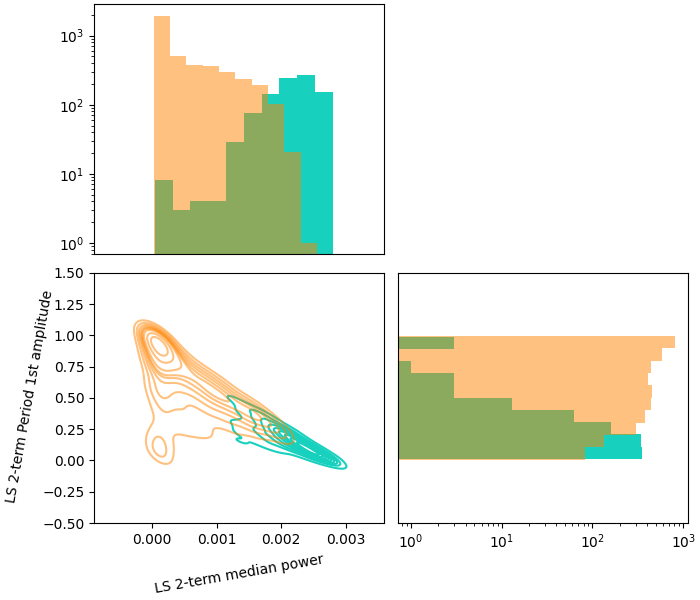

[]

In [85]:
%matplotlib notebook
features = 2

shorthand = [f'f{i}' for i in range(features)]
mosaic = """
        A.
        BC"""

fig = plt.figure(figsize=(7,6), constrained_layout=True).subplot_mosaic(mosaic)

# for the two medians
xlmin = -0.0009
xlmax = 0.0036
ylmin = -0.5#-0.0004
ylmax = 1.5#0.001505

sns.kdeplot(ax=fig['B'], 
            x=corner_features[0][(p_r_t_test>0) & (predictions==0)],
            y=corner_features[2][(p_r_t_test>0) & (predictions==0)],
#                                 fill=True, alpha=0.9,
            color='#17d1be', log_scale=False)
sns.kdeplot(ax=fig['B'], 
            x=corner_features[0][(p_r_t_test>0) & (predictions==1)],
            y=corner_features[2][(p_r_t_test>0) & (predictions==1)],
#                                 fill=True, alpha=0.7, 
            color='#ff8400', log_scale=False, alpha=0.5)

fig['B'].set_xlabel(corner_feature_names[0], rotation=10)
fig['B'].set_ylabel(corner_feature_names[2], rotation=80)
fig['B'].set_xlim(xlmin, xlmax)
fig['B'].set_ylim(ylmin, ylmax)

#         elif i == j:            
fig['A'].hist(corner_features[0][(p_r_t_test>0) & (predictions==0)],
                            log=True, density=False, color='#17d1be')
fig['A'].hist(corner_features[0][(p_r_t_test>0) & (predictions==1)], 
                            log=True, density=False, color='#ff8400', alpha=0.5)
fig['A'].set_xlim(xlmin, xlmax)
fig['A'].set_xticks([])

fig['C'].hist(corner_features[2][(p_r_t_test>0) & (predictions==0)], orientation='horizontal',
                            log=True, density=False, color='#17d1be')
fig['C'].hist(corner_features[2][(p_r_t_test>0) & (predictions==1)], orientation='horizontal', 
                            log=True, density=False, color='#ff8400', alpha=0.5)
fig['C'].set_ylim(ylmin, ylmax)
fig['C'].set_yticks([])


<IPython.core.display.Javascript object>


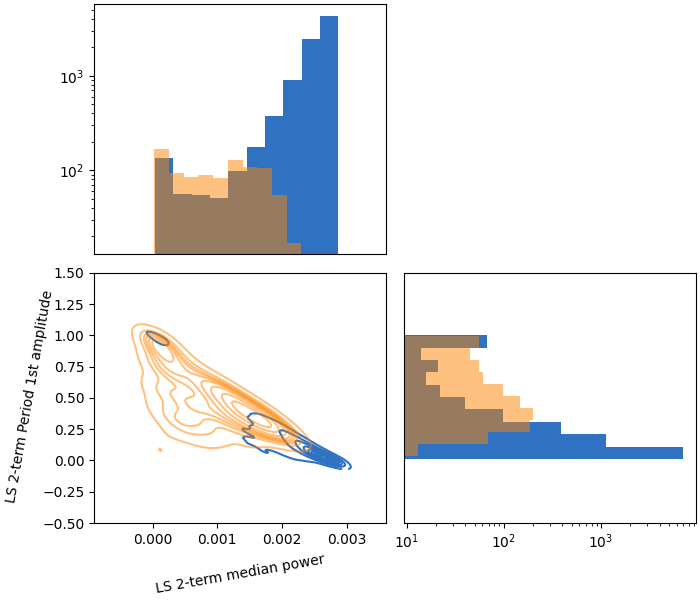

[]

In [86]:
%matplotlib notebook

mosaic = """
        A.
        BC"""

fig = plt.figure(figsize=(7,6), constrained_layout=True).subplot_mosaic(mosaic)

# for the two medians
xlmin = -0.0009
xlmax = 0.0036
ylmin = -0.5#-0.0004
ylmax = 1.5#0.001505

sns.kdeplot(ax=fig['B'], 
            x=corner_features[0][(p_r_t_test==0) & (predictions==0)],
            y=corner_features[2][(p_r_t_test==0) & (predictions==0)],
#                                 fill=True, alpha=0.9,
            color='#3072c2', log_scale=False)
sns.kdeplot(ax=fig['B'], 
            x=corner_features[0][(p_r_t_test==0) & (predictions==1)],
            y=corner_features[2][(p_r_t_test==0) & (predictions==1)],
#                                 fill=True, alpha=0.7, 
            color='#ff8400', log_scale=False, alpha=0.5)

fig['B'].set_xlabel(corner_feature_names[0], rotation=10)
fig['B'].set_ylabel(corner_feature_names[2], rotation=80)
fig['B'].set_xlim(xlmin, xlmax)
fig['B'].set_ylim(ylmin, ylmax)

#         elif i == j:            
fig['A'].hist(corner_features[0][(p_r_t_test==0) & (predictions==0)],
                            log=True, density=False, color='#3072c2')
fig['A'].hist(corner_features[0][(p_r_t_test==0) & (predictions==1)], 
                            log=True, density=False, color='#ff8400', alpha=0.5)
fig['A'].set_xlim(xlmin, xlmax)
fig['A'].set_xticks([])

fig['C'].hist(corner_features[2][(p_r_t_test==0) & (predictions==0)], orientation='horizontal',
                            log=True, density=False, color='#3072c2')
fig['C'].hist(corner_features[2][(p_r_t_test==0) & (predictions==1)], orientation='horizontal', 
                            log=True, density=False, color='#ff8400', alpha=0.5)
fig['C'].set_ylim(ylmin, ylmax)
fig['C'].set_yticks([])